In [1]:
import pandas as pd
import numpy as np

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [16]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error

In [3]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.index.freq='MS'

<AxesSubplot:xlabel='Month'>

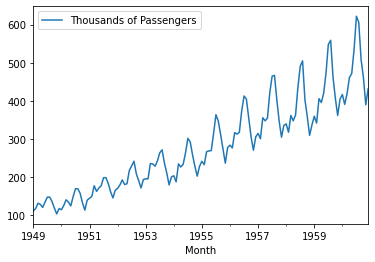

In [6]:
df.plot()

In [7]:
seasonalDecomposition=seasonal_decompose(df,model='mul')

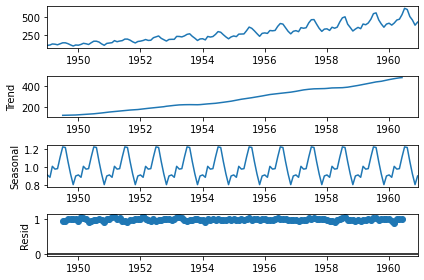

In [9]:
seasonalDecomposition.plot();

In [10]:
auto_arima(df,seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.18 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.65 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.21 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.63 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.07 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.15 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.50 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.60 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.78 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 12 Apr 2022   AIC                           1017.847
Time:                                     07:44:39   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.599      0.000      -1.057      -0.907
sigma2       129.3152     14.557      8.883      0.000     100.784     157.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
train=df.iloc[:-12]
test=df.iloc[-12:]
len(test)

12

In [12]:
model=SARIMAX(train,order=(2,1,1),seasonal_order=(0,1,0,12))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42129D+00    |proj g|=  2.27842D-01

At iterate    5    f=  3.39217D+00    |proj g|=  1.21740D-02

At iterate   10    f=  3.39006D+00    |proj g|=  2.06911D-03

At iterate   15    f=  3.39003D+00    |proj g|=  1.15965D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     40      2     0     0   1.846D-06   3.390D+00
  F =   3.3900246510162053     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -447.483
Date:                             Tue, 12 Apr 2022   AIC                            902.967
Time:                                     07:48:43   BIC                            914.083
Sample:                                 01-01-1949   HQIC                           907.481
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5252      0.928     -0.566      0.572      -2.345       1.295
ar.L2          0.0110      0.275      0.040      0.968      -0.529       0.551
ma.L1          0.3064      0.935      0.328      0.743      -1.527       2.139
sigma2       108.0093     13.498      8.002      0.000      81.553     134.466
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.97   Prob(JB):                         0.50
Heteroskedasticity (H):               1.47   Skew:                            -0.09
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
start=len(train)
end=start+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False).rename('SARIMA(2,1,1)(0,1,0,12)')

<AxesSubplot:xlabel='Month'>

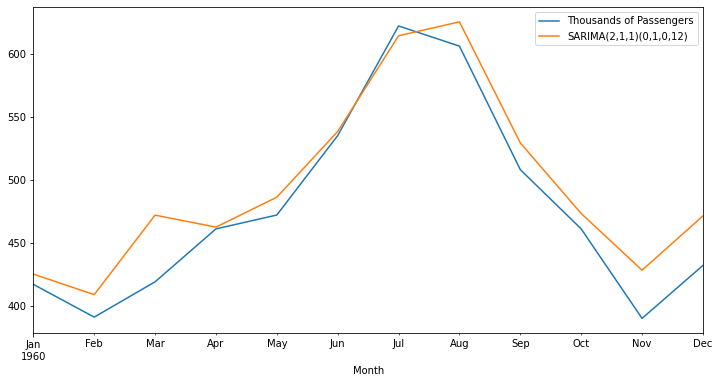

In [21]:
ax=test.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [17]:
mean_absolute_percentage_error(test,predictions)

0.04431781829742987

In [ ]:
df['date']=pd.to_datetime(dict(year=df['year'],month=df['month'],day=1))